# Домашнее задание

Решение выполнения задач необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в GitHub.

В файле должны быть сохранены результаты запуска на тестовых данных.

Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

 -   Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
 -   Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
 -   Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
 -   Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
DATA_PATH = 'D:/proj/python3/py_11/PY11/hw20/'

In [5]:

names_by_year = {}
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv(
    DATA_PATH + 'yob{}.txt'.format(year),
    names=['Name','Gender','Count']
)
names_all = pd.concat(
    names_by_year,
    names=['Year', 'Pos']
)

### Задача №1

Построить график изменения количества имен Ruth и Robert с 1900 по 2000

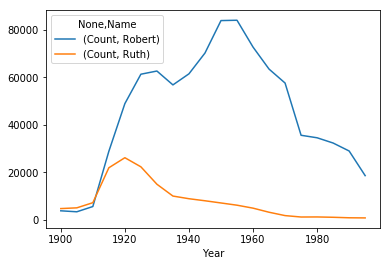

In [6]:
name_dynamics_cols_hw = (names_all
    .groupby(
        [
            names_all.index.get_level_values(0),
        'Name'
        ]
    )
    .sum()
    .query('Name == ["Ruth", "Robert"]')
    .unstack('Name')
).plot()

### Задача №2
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

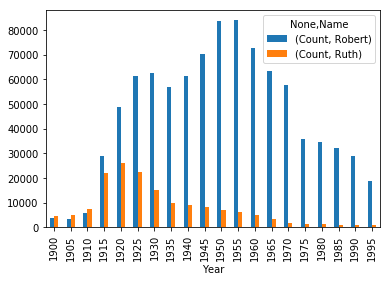

In [7]:
name_dynamics_cols_hw = (names_all
    .groupby(
        [
            names_all.index.get_level_values(0),
            'Name'
        ]
    )
    .sum()
    .query('Name == ["Ruth", "Robert"]')
    .unstack('Name')
).plot.bar()

### Задача №3
Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

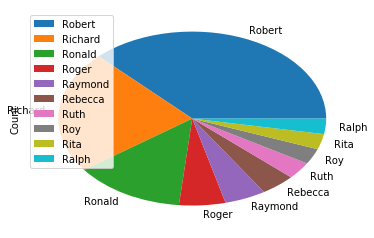

In [8]:
names_1950 = pd.read_csv(
    DATA_PATH + 'yob{}.txt'.format(1950),
    names=['Name','Gender','Count'])
(names_1950[(names_1950.Name.str.startswith("R"))]
    .groupby('Name')
    .sum()
    .sort_values(by='Count', ascending=False)
    .head(10)
).plot.pie(y='Count')

### Задача №4
Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [9]:
def count_consonant(word):
    count_c = 0
    for letter in word:
        if letter not in 'aeiouy':
            count_c+=1
    return count_c

In [10]:
def name_to_count_consonant(row):
    row.Name = count_consonant(row.Name)
    return row

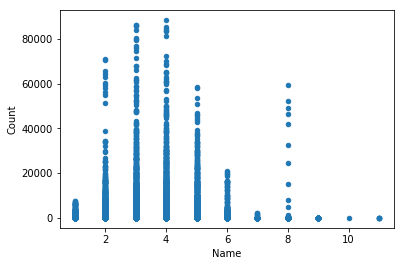

In [11]:
name_by_len = names_all.apply(name_to_count_consonant, axis=1)
name_by_len.plot.scatter(x='Name', y='Count')